<a href="https://colab.research.google.com/github/VidyaPedapothu/cs480student/blob/main/CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

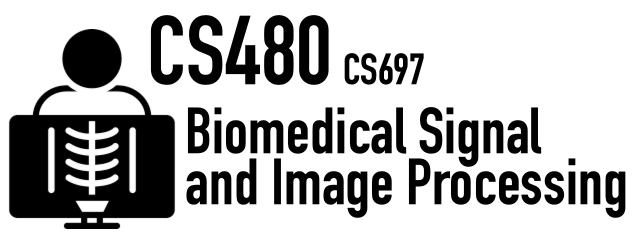
#Assignment 7

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

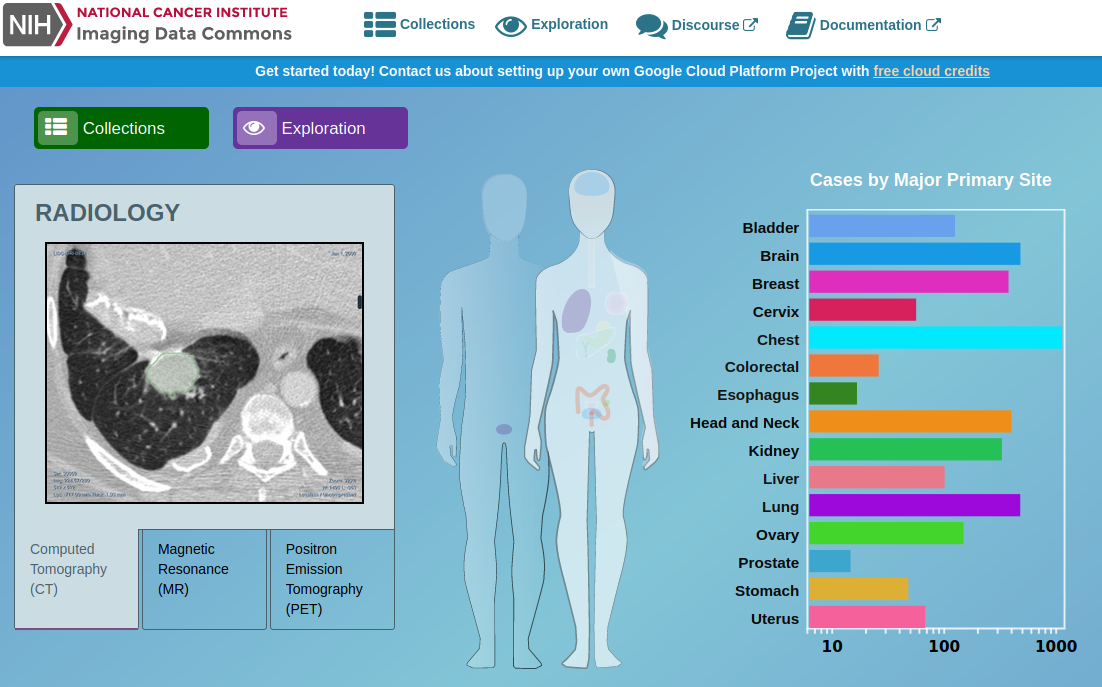

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

TODO: Add screenshot

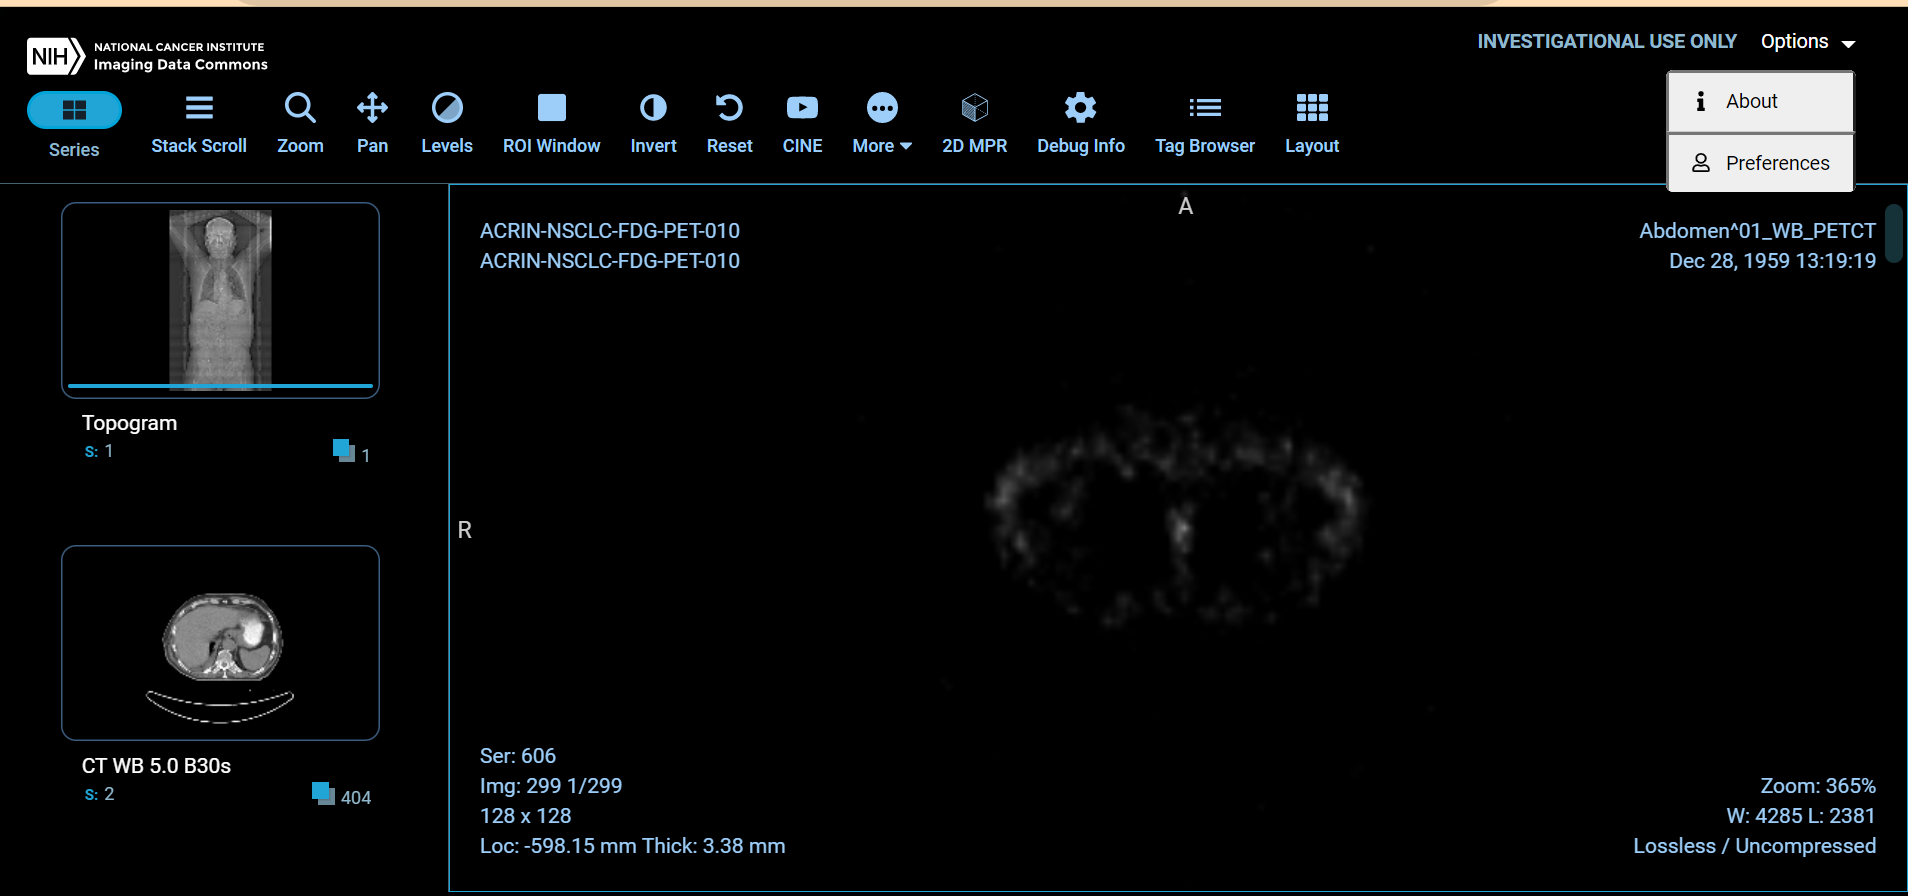

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

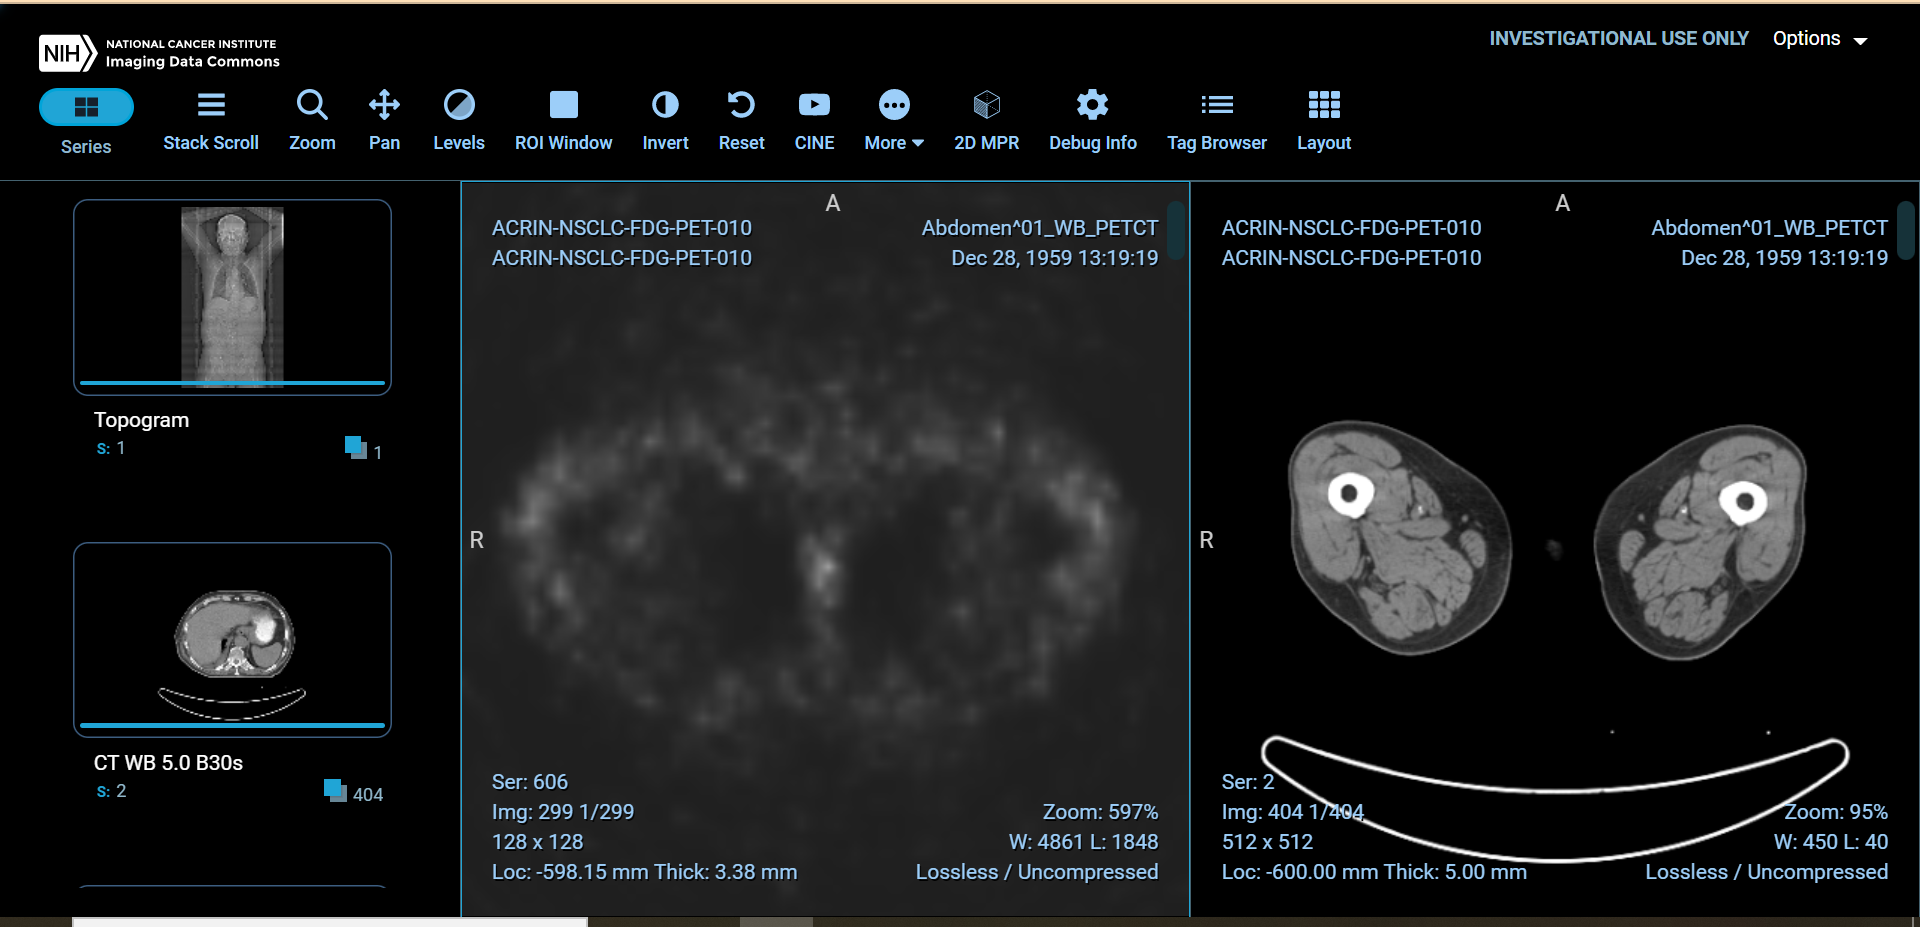

TODO: Add screenshot

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [ ]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [ ]:
# Question 1): What is MPR?
#

In [ ]:
# TODO: YOUR ANSWER

The process of transforming data from an imaging modality acquired in one plane, usually axial, into another plane is known as multiplanar reformation or reconstruction (MPR). It's most typically done with thin-slice data from volumetric CT in the axial plane, but it may be done with any plane and any modality that can provide cross-sectional imaging, including MRI, PET, and SPECT.

In [ ]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

Maximum Intensity Projection (MIP)

For a 2D image, MIP is a feature that highlights the voxel with the highest attenuation value at all viewings and full volume. MIP can be used to locate all hyperdensing structures in a volume within a certain range. This approach tends to reveal contrasting bone structures while also concealing lower attenuation structures.

Minmimum Intensity Projection (MinIP)

The MinIP works in a similar way to the MIP, but instead of displaying the voxels with the maximum attenuation, it displays the ones with the least. MinIP solely represents the volume's hypodense structures, making it an excellent tool for detecting, localising, and quantifying ground-glass and linear attenuation patterns in chest scans. MinIP is notably beneficial for analysing the biliary tree and pancreatic duct, which are hypodense in comparison to surrounding tissue, particularly in the pancreatic fase.

AvgIP (Average Intensity Projection):

AvgIP works similarly to the other intensity projection modes, except instead of displaying the highest/lowest attenuation, it displays the average attenuation. This technique can be used to identify the interior structures of solid organs as well as the walls of hollow structures like blood vessels and intestines.



In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

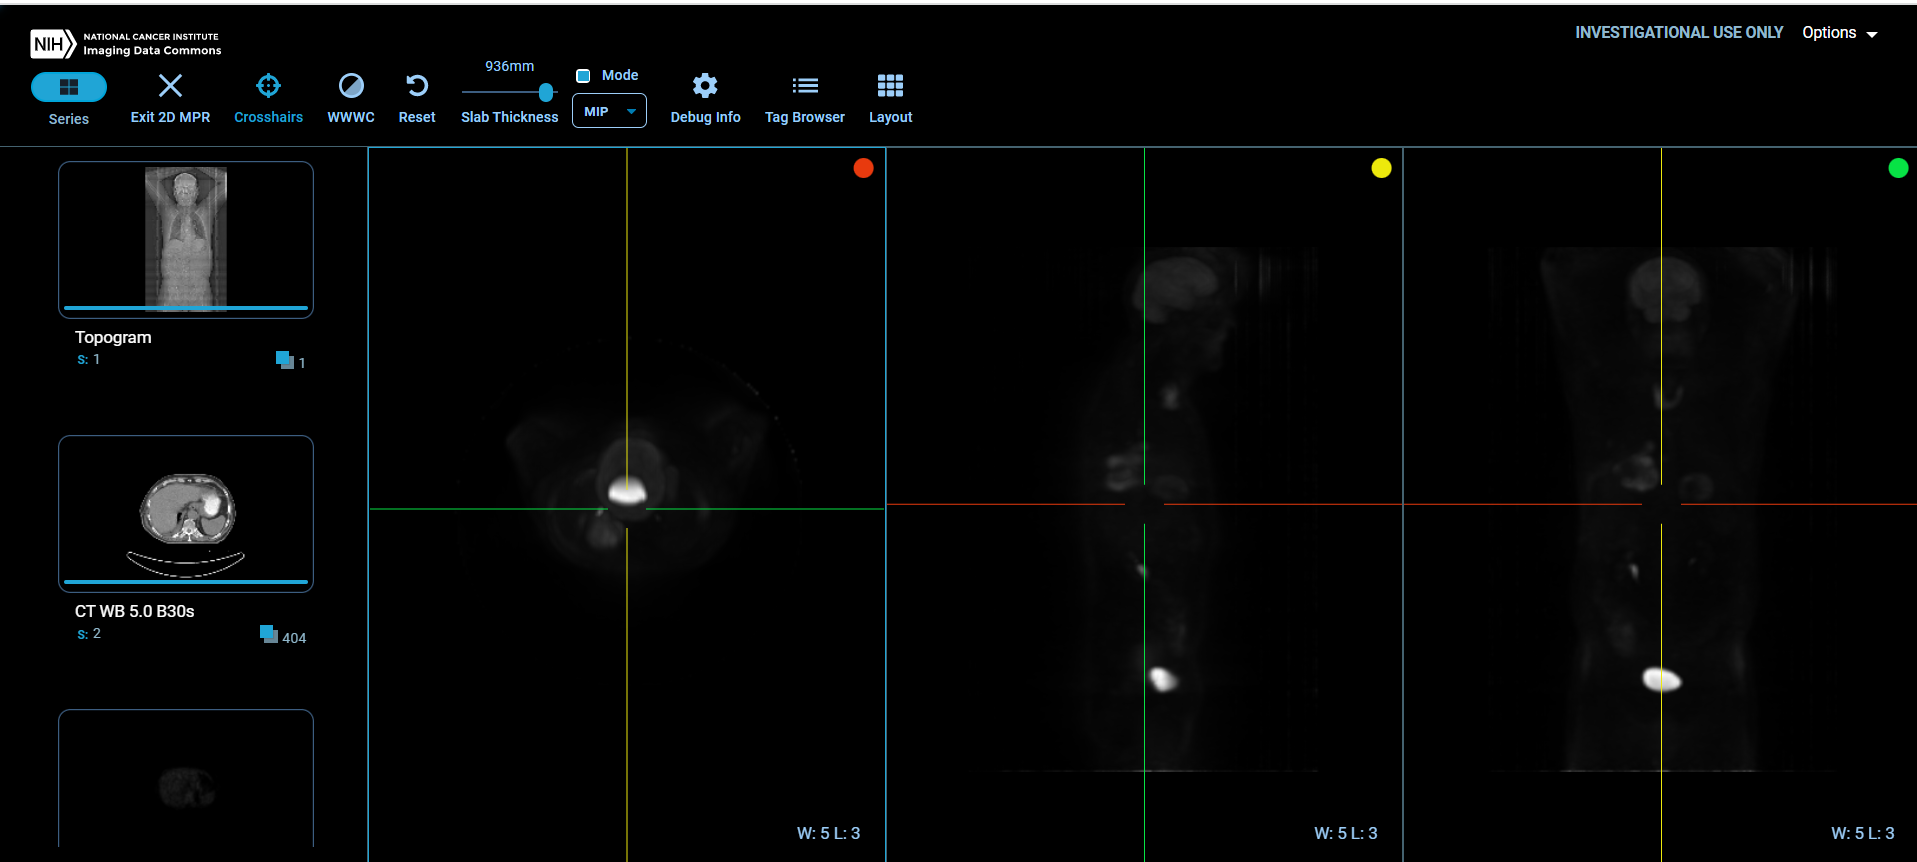

TODO: Add screenshot

In [ ]:
# Question 3): What does the Slab Thickness slider do?
#

The Slab Thickness Slider adjusts the slice thickness.

In [ ]:
# TODO: YOUR ANSWER

**Task 4**: Let's access the pixel data! [20 Points]

In [ ]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [ ]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

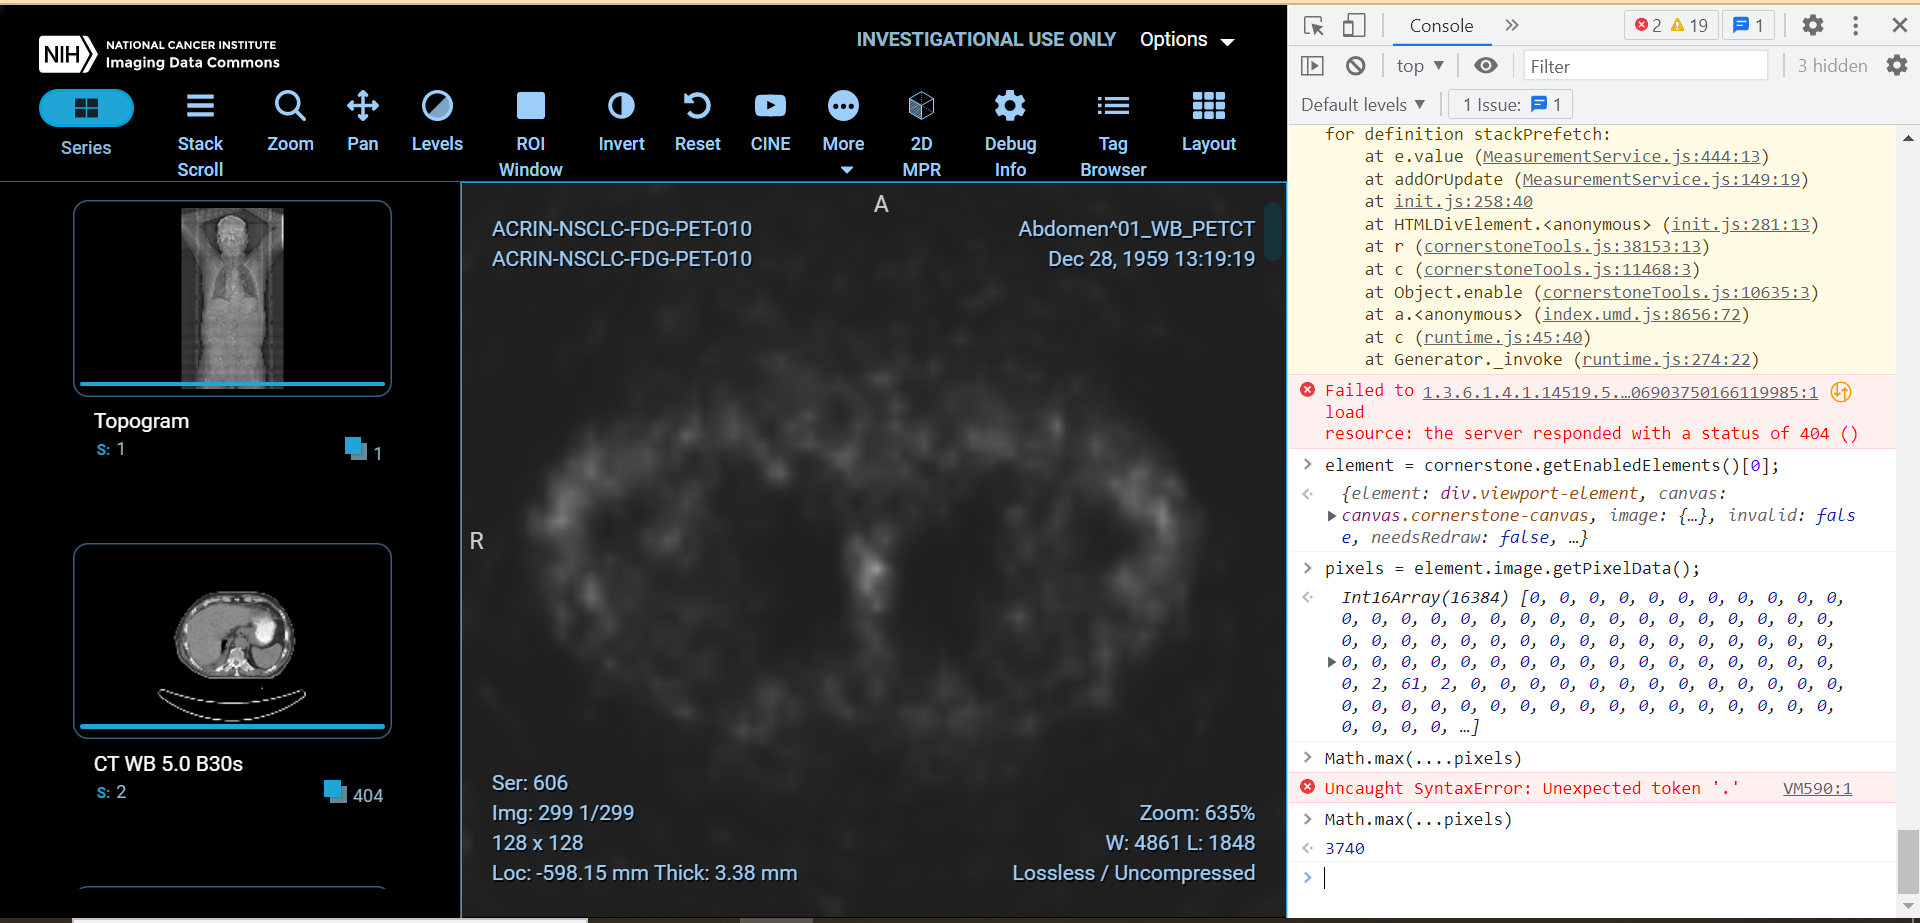

In [ ]:
# TODO: YOUR ANSWER


Maximum pixel value is 3740

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [ ]:
"""#
#
# TODO: YOUR CODE GOES HERE
#
#
element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();
temp_pixels  =Array.from(pixels);

w = element.image.width;
h = element.image.height;

var pixels_reshape = [];
while(temp_pixels.length) pixels_reshape.push(temp_pixels.splice(0,w));

var temp_new_pixels = new Array(h);
for (i=0; i < temp_new_pixels.length; i++){
  temp_new_pixels[i]=new Array(w);
  temp_new_pixels[i].fill(0)
}

for (var i = 1; i < h-1; i++) {
  for (var j = 1; j < w-1; j++) {
    var UpperLeft = pixels_reshape[i-1][j-1];
    var UpperMiddle = pixels_reshape[i-1][j];
    var UpperRight = pixels_reshape[i-1][j+1];
    var CenterLeft = pixels_reshape[i][j-1];
    var CenterMiddle = pixels_reshape[i][j];
    var CenterRight = pixels_reshape[i][j+1];
    var LowerLeft = pixels_reshape[i+1][j-1];
    var LowerMiddle = pixels_reshape[i+1][j];
    var LowerRight = pixels_reshape[i+1][j+1];
    var valx = UpperLeft + CenterLeft*2 + LowerLeft - UpperRight - CenterRight*2 - LowerRight;
    var valy = UpperLeft + UpperMiddle*2 + UpperRight - LowerLeft - LowerMiddle*2 - LowerRight;

    temp_new_pixels[i][j]=Math.abs(valx)+Math.abs(valy);    
  }
}

var new_pixels = Array.prototype.concat.apply([], temp_new_pixels);
pixels.set(new_pixels);
cornerstone.renderGrayscaleImage(element, true)"""

'#\n#\n# TODO: YOUR CODE GOES HERE\n#\n#\nelement = cornerstone.getEnabledElements()[0];\npixels = element.image.getPixelData();\ntemp_pixels  =Array.from(pixels);\n\nw = element.image.width;\nh = element.image.height;\n\nvar pixels_reshape = [];\nwhile(temp_pixels.length) pixels_reshape.push(temp_pixels.splice(0,w));\n\nvar temp_new_pixels = new Array(h);\nfor (i=0; i < temp_new_pixels.length; i++){\n  temp_new_pixels[i]=new Array(w);\n  temp_new_pixels[i].fill(0)\n}\n\nfor (var i = 1; i < h-1; i++) {\n  for (var j = 1; j < w-1; j++) {\n    var UpperLeft = pixels_reshape[i-1][j-1];\n    var UpperMiddle = pixels_reshape[i-1][j];\n    var UpperRight = pixels_reshape[i-1][j+1];\n    var CenterLeft = pixels_reshape[i][j-1];\n    var CenterMiddle = pixels_reshape[i][j];\n    var CenterRight = pixels_reshape[i][j+1];\n    var LowerLeft = pixels_reshape[i+1][j-1];\n    var LowerMiddle = pixels_reshape[i+1][j];\n    var LowerRight = pixels_reshape[i+1][j+1];\n    var valx = UpperLeft + Center

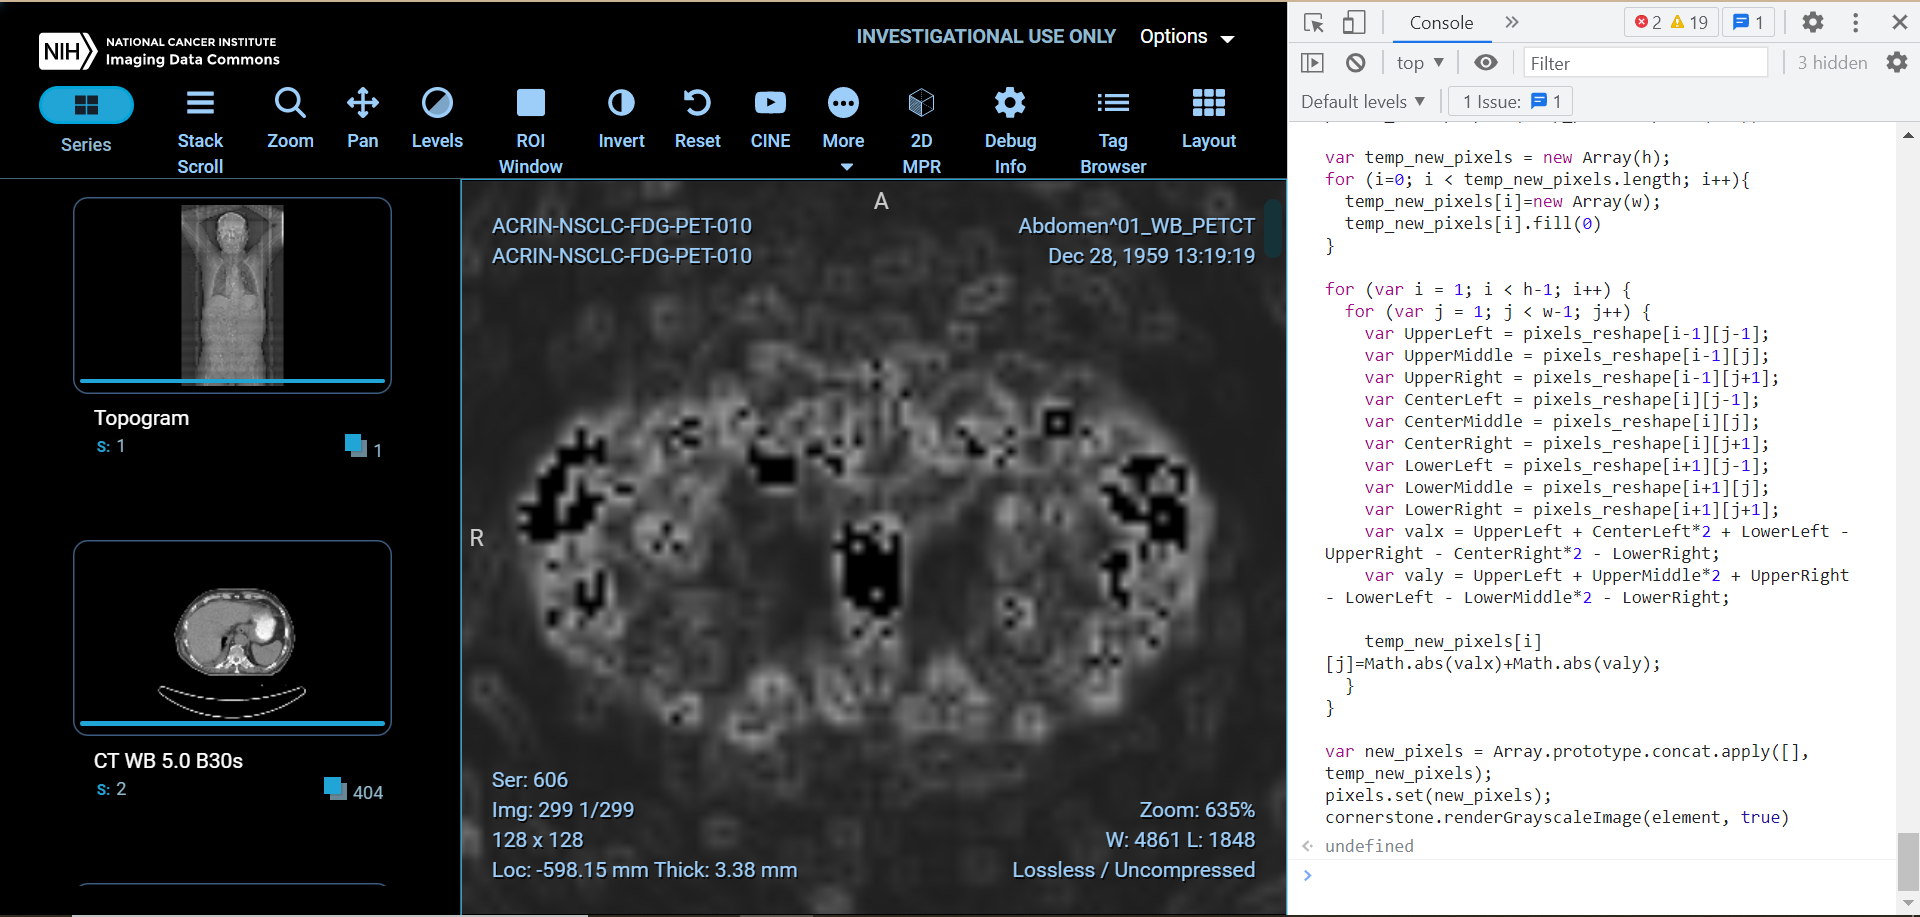

In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

TODO: ADD SCREENSHOT

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

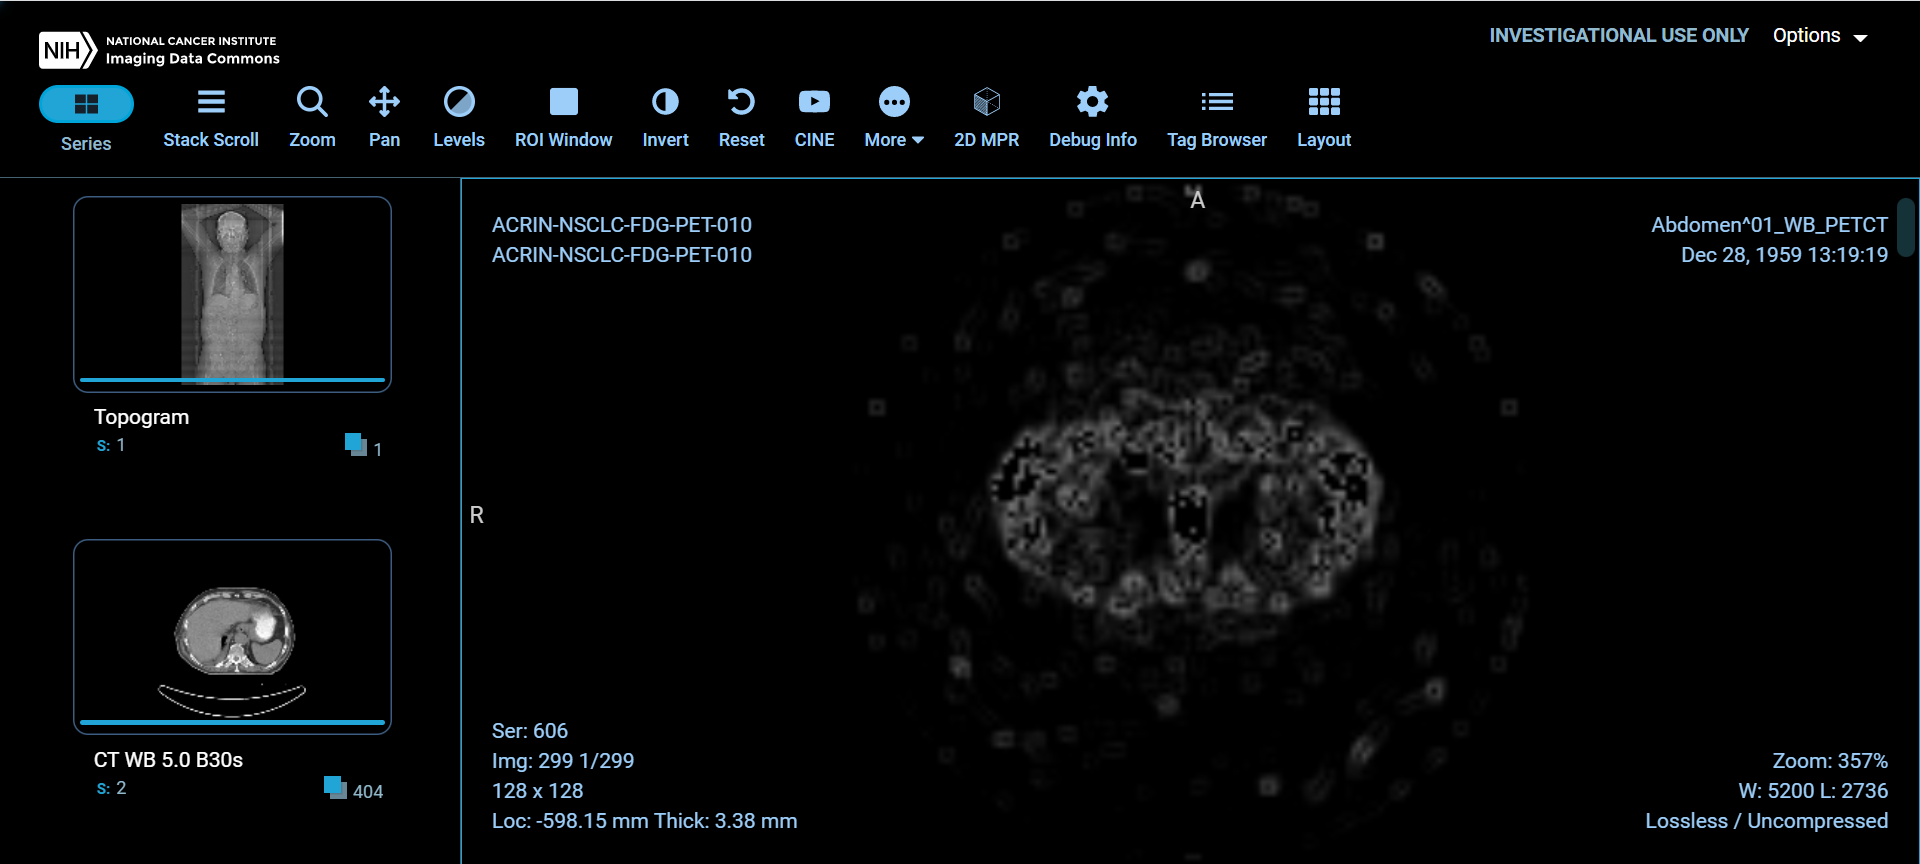

Codee : cornerstone.renderGrayscaleImage(element, true)

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#

colab with  praveen 